<a href="https://colab.research.google.com/github/shawdaena/Artificial_intelligence_Lab/blob/main/Assignment3(AI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical

In [7]:
  #--- Load data
  (trainX, trainY), (testX, testY) = load_data()

In [9]:
  #--- Cross-check
  print(trainX.shape, trainY.shape)
  print(testX.shape, testY.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [11]:
  #--- Normalize and one-hot encode
  trainX = trainX.astype('float32') / 255.0
  testX = testX.astype('float32') / 255.0
  trainY = to_categorical(trainY, num_classes=10)
  testY = to_categorical(testY, num_classes=10)

In [16]:
  inputs = Input((28, 28), name='input_layer')
  x = Flatten(name='flatten')(inputs)
  x = Dense(64, activation='relu', name='dense_1')(x)
  x = Dense(128, activation='relu', name='dense_2')(x)
  x = Dense(64, activation='relu', name='dense_3')(x)
  outputs = Dense(10, activation='softmax', name='output_layer')(x)

  model = Model(inputs, outputs, name='mnist_classifier')

In [13]:
  model.summary()

Model: "mnist_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,466 (263.54 KB)

 Trainable params: 67,466 (263.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
  #--- Compile model with Adam optimizer and categorical crossentropy loss
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
  #--- Train model
  history = model.fit(trainX, trainY, validation_split=0.1, epochs=10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8459 - loss: 0.5086 - val_accuracy: 0.9657 - val_loss: 0.1161
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9628 - loss: 0.1253 - val_accuracy: 0.9723 - val_loss: 0.0960
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9736 - loss: 0.0858 - val_accuracy: 0.9732 - val_loss: 0.0951
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9794 - loss: 0.0671 - val_accuracy: 0.9697 - val_loss: 0.1022
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9824 - loss: 0.0553 - val_accuracy: 0.9685 - val_loss: 0.1106
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9846 - loss: 0.0462 - val_accuracy: 0.9748 - val_loss: 0.0909
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9879 - loss: 0.0391 - val_accuracy: 0.9723 - val_loss: 0.1095
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9889 - loss: 0.0350 

In [20]:
  #--- Evaluate on test data
  test_loss, test_acc = model.evaluate(testX, testY)
  print(f"\nTest Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9682 - loss: 0.1278

Test Accuracy: 0.9724 | Test Loss: 0.1106


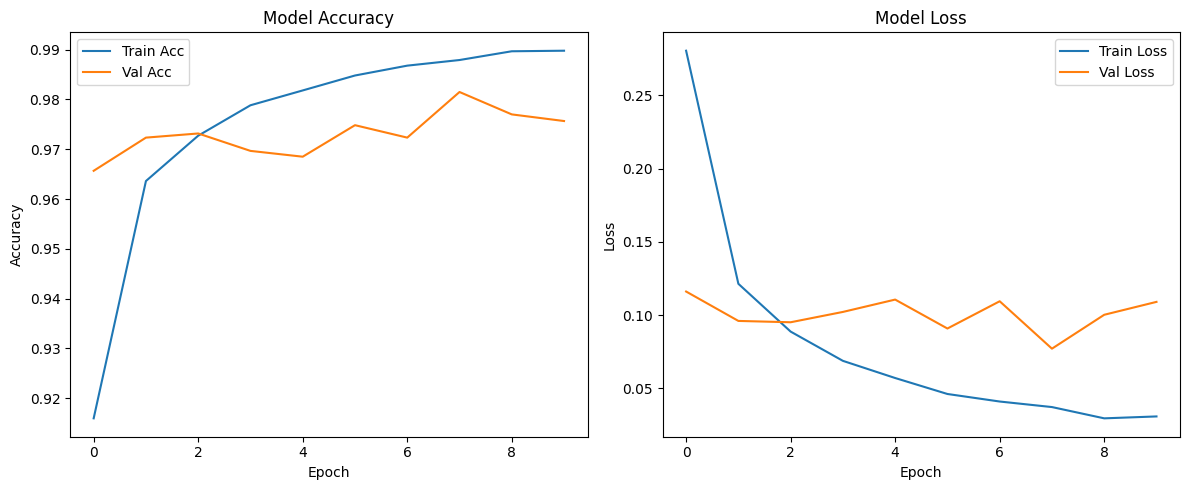

In [22]:
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

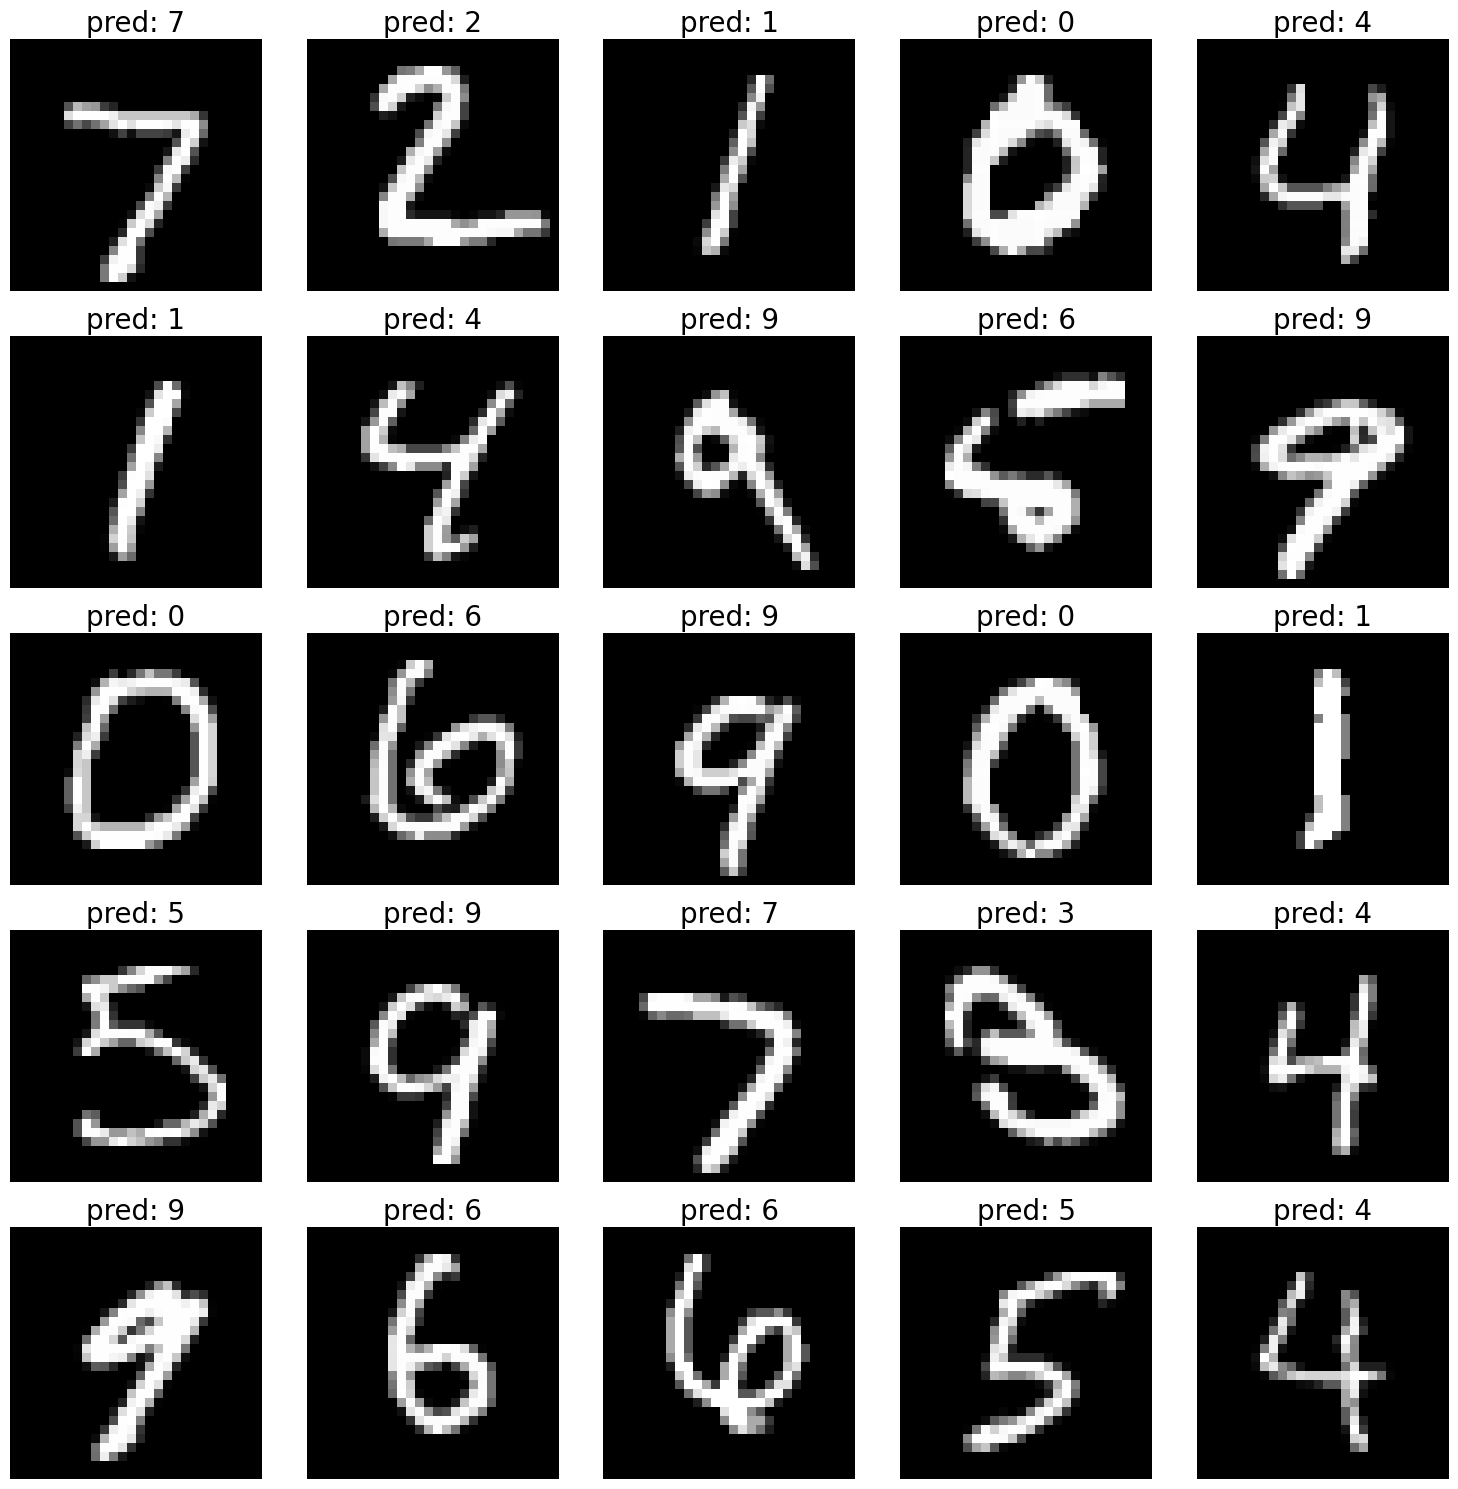

In [24]:
plt.figure(figsize=(15,15))
n_show = min(25, len(testX))
rows, cols = 5, 5

for i in range(n_show):
    plt.subplot(rows, cols, i+1)

    sample = testX[i].reshape(1, 28, 28)

    pred = model.predict(sample, verbose=0).argmax(axis=1)[0]
    plt.title(f"pred: {pred}", fontsize=20)

    plt.imshow(testX[i], cmap="gray")
    plt.axis('off')

plt.tight_layout()
plt.show()